## Importing Essential Libraries

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.optimizers import Adam,RMSprop
from keras.layers import Dense
from keras.utils.np_utils import to_categorical
from keras.datasets import mnist
import random
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

## Spliting Dataset

In [0]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

## Checking Shape of images

In [32]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


## Using Assert Function To Cross Validate Data

In [0]:
assert(x_train.shape[0]==y_train.shape[0]),"Image Lengths Are Not Same"
assert(x_test.shape[0]==y_test.shape[0]),'Image Lengths Are Not Same'
assert(x_train.shape[1:]==(28,28)),'Shapes Are Not Same'
assert(x_test.shape[1:]==(28,28)),"Shapes Are Not Same"

## Plotting The Images

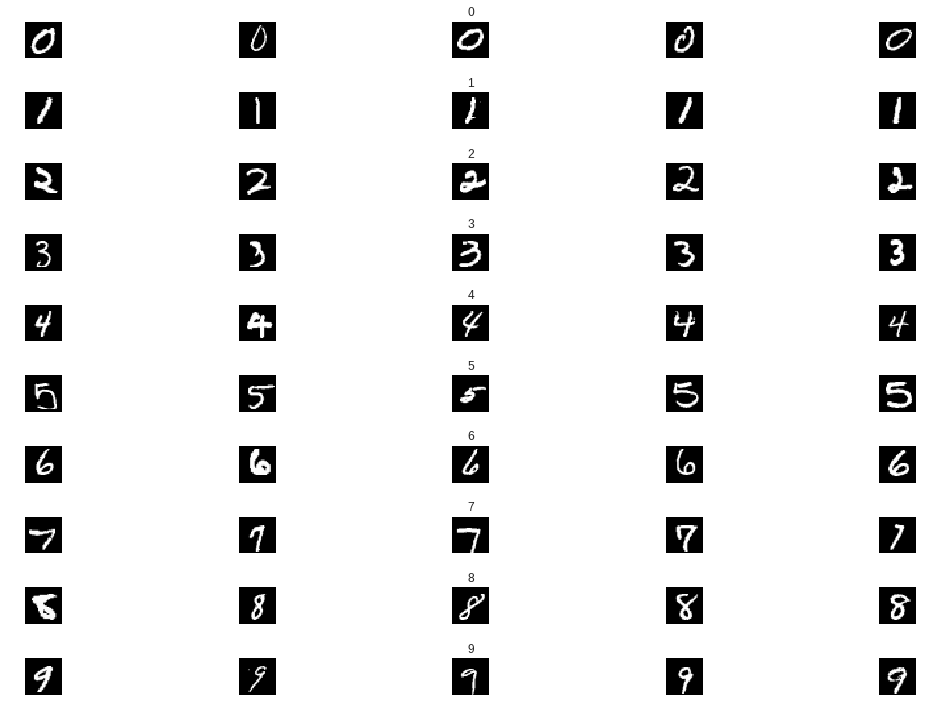

In [34]:
numberOfSamples = []
classes = 10
cols = 5
fig,axs = plt.subplots(nrows=classes,ncols=cols,figsize=(15,10))
fig.tight_layout()
for i in range(cols):
  for j in range(classes):
    x_selected = x_train[y_train==j]
    axs[j][i].imshow(x_selected[random.randint(0,len(x_selected)),:,:],cmap="gray")
    axs[j][i].axis('off')
    if(i==2):
      axs[j][i].set_title(j)
      numberOfSamples.append(len(x_selected))

## Ploting Bar Plot For Number Of Samples

Text(0, 0.5, 'Number Of Samples')

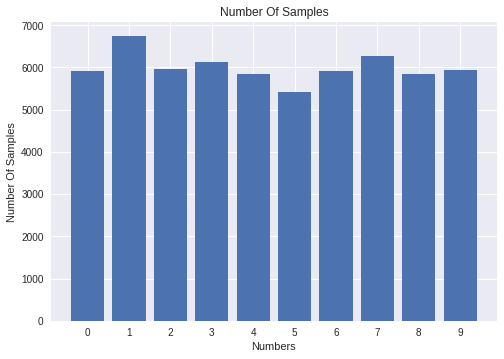

In [35]:
plt.bar(range(0,len(numberOfSamples)),numberOfSamples)
plt.xticks(np.arange(0,len(numberOfSamples)))
plt.title("Number Of Samples")
plt.xlabel("Numbers")
plt.ylabel("Number Of Samples")

## Convert Y Data Into Categorical

In [0]:
y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)

## Convert Every Image Into 0 To 1 Format For Faster Performance

In [0]:
x_train = x_train/255
x_test = x_test/255

## Convert Image Into 28 By 28 By 1

In [0]:
x_train = x_train.reshape(x_train.shape[0],28,28,1)
x_test = x_test.reshape(x_test.shape[0],28,28,1)

In [39]:
x_train[0].shape

(28, 28, 1)

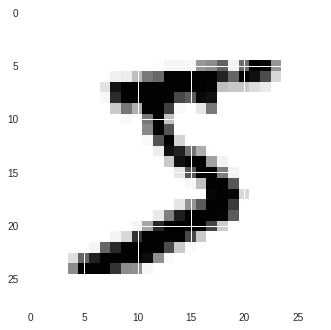

In [40]:
plt.imshow(x_train[0].reshape(28,28))

In [0]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(x_train)

In [0]:
def lenet():
  model = Sequential()
  
  model.add(Conv2D(32,(5,5),input_shape=(28,28,1),activation="relu",padding="same"))
  model.add(Conv2D(32,(5,5),activation="relu",padding="same"))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Dropout(0.25))
  
  model.add(Conv2D(64,(3,3),activation="relu",padding="same"))
  model.add(Conv2D(32,(5,5),activation="relu",padding="same"))
  model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
  model.add(Dropout(0.25))

  model.add(Flatten())
  model.add(Dense(256,activation="relu"))
  model.add(Dropout(0.2))
  model.add(Dense(10,activation="softmax"))
  model.compile(RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0),'categorical_crossentropy',metrics=['accuracy'])
  return model

In [43]:
model = lenet()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 28, 28, 32)        832       
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 28, 28, 32)        25632     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 14, 14, 64)        18496     
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 14, 14, 32)        51232     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 7, 7, 32)          0         
__________

In [45]:
h = model.fit(x=x_train,y=y_train,verbose=1,shuffle=123,validation_split=0.1,batch_size=400,epochs=10)

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 8s 142us/step - loss: 0.0329 - acc: 0.9901 - val_loss: 0.0200 - val_acc: 0.9940
Epoch 2/10
54000/54000 [==============================] - 8s 140us/step - loss: 0.0260 - acc: 0.9918 - val_loss: 0.0217 - val_acc: 0.9935
Epoch 3/10
54000/54000 [==============================] - 7s 137us/step - loss: 0.0226 - acc: 0.9932 - val_loss: 0.0207 - val_acc: 0.9942
Epoch 4/10
54000/54000 [==============================] - 8s 140us/step - loss: 0.0195 - acc: 0.9940 - val_loss: 0.0273 - val_acc: 0.9920
Epoch 5/10
54000/54000 [==============================] - 8s 140us/step - loss: 0.0171 - acc: 0.9943 - val_loss: 0.0198 - val_acc: 0.9945
Epoch 6/10
54000/54000 [==============================] - 7s 136us/step - loss: 0.0154 - acc: 0.9951 - val_loss: 0.0227 - val_acc: 0.9937
Epoch 7/10
54000/54000 [==============================] - 7s 136us/step - loss: 0.0144 - acc: 0.9953 - val_loss: 0.0210 - v

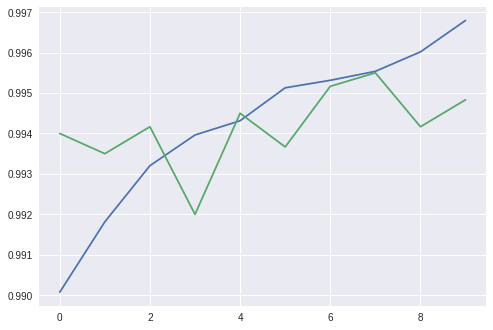

In [46]:
plt.plot(h.history['acc'])
plt.plot(h.history['val_acc'])

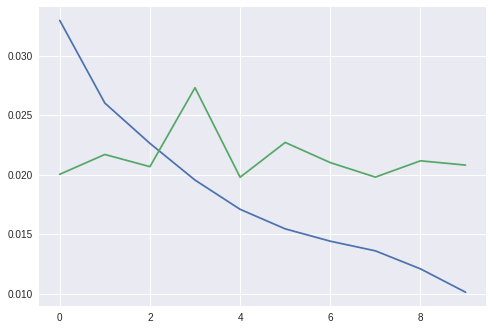

In [47]:
plt.plot(h.history['loss'])
plt.plot(h.history['val_loss'])

## Testing With Real Data

In [0]:
import requests
from PIL import Image
import cv2

In [0]:
url = "https://www.researchgate.net/profile/Jose_Sempere/publication/221258631/figure/fig1/AS:305526891139075@1449854695342/Handwritten-digit-2.png"
res = requests.get(url,stream=True)
img = Image.open(res.raw)
img = np.asarray(img)
img = cv2.resize(img,(28,28))
img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
img = img.reshape(1,28,28,1)

In [0]:
prediction = model.predict_classes(img)

In [58]:
prediction

array([1])

In [0]:
model.save("digit.h5")

In [0]:
from keras.models import load_model

In [0]:
data = load_model('./digit.h5')

In [62]:
data.predict_classes(img)

array([1])